In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys

In [ ]:
#Load the datasets
project_path = os.path.abspath(os.path.join('..'))

sys.path.append('../')
if project_path not in sys.path:
    sys.path.insert(0, project_path)
    
from src.loader import domains_loader, traffic_loader, news_rating_loader

domains_dataset = domains_loader('../datasets/domains_location.csv')
traffic_dataset = traffic_loader('../datasets/traffic.csv')
rating_dataset = news_rating_loader('../datasets/rating.csv')
rating_dataset.head(5)


,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


Top 10 websites with highest article count: 
source_name
ETF Daily News        16746
The Times of India     7504
GlobeNewswire          5423
Globalsecurity.org     3119
Forbes                 2784
BBC News               2113
ABC News               2058
Business Insider       2034
The Punch              1800
Al Jazeera English     1664
Name: count, dtype: int64


<Axes: xlabel='source_name'>

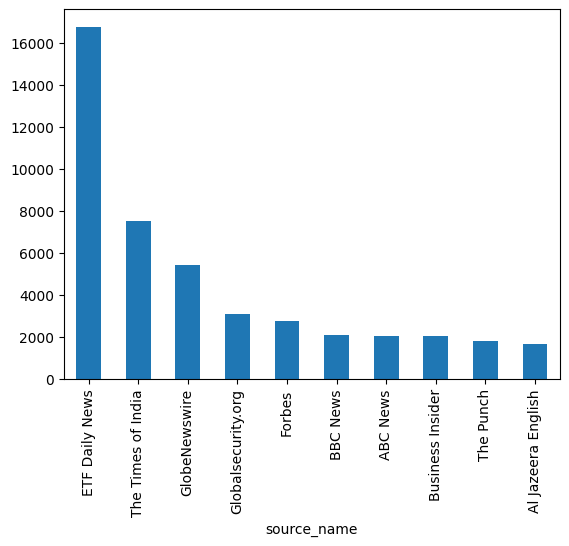

In [ ]:
# value_count - Return a Series containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element.
# rating_dataset.columns
print("Top 10 websites with highest article count: ")
print(rating_dataset['source_name'].value_counts().head(10))

rating_dataset['source_name'].value_counts() \
    .head(10) \
        .plot(kind='bar')

Top 10 websites with lowest article count: 
source_name
CNA                            674
Time                           600
Android Central                522
Gizmodo.com                    388
ReadWrite                      324
Euronews                       286
Wired                          270
CNN                            267
The Verge                      214
AllAfrica - Top Africa News     20
Name: count, dtype: int64


<Axes: xlabel='source_name'>

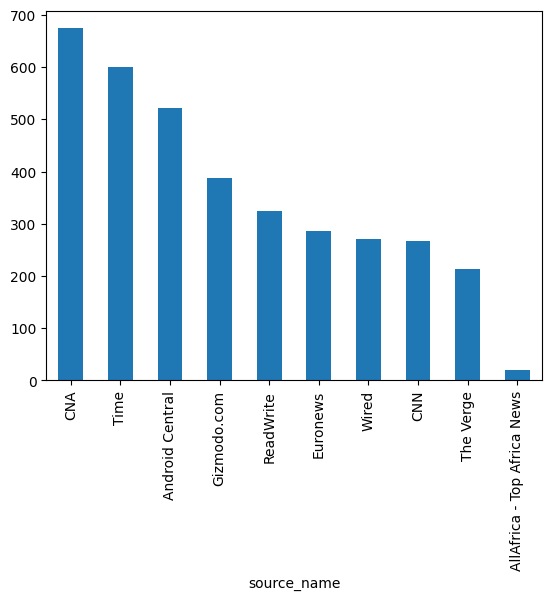

In [ ]:
print("Top 10 websites with lowest article count: ")
print(rating_dataset['source_name'].value_counts().tail(10))
rating_dataset['source_name'].value_counts() \
    .tail(10) \
        .plot(kind='bar')

Top 10 websites with highest value of visitors traffic:


,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,471274,2151358,google.com,com,1,1,471248,2147402
1,2,2,facebook.com,com,465424,2250631,facebook.com,com,2,2,465297,2247135
2,3,3,youtube.com,com,420579,1852995,youtube.com,com,3,3,420483,1848940
3,4,4,twitter.com,com,404985,1757127,twitter.com,com,4,4,404998,1753939
4,5,5,instagram.com,com,364746,1598085,instagram.com,com,5,5,364618,1594892
5,6,6,linkedin.com,com,337391,1319082,linkedin.com,com,6,6,337393,1316218
6,7,7,apple.com,com,263655,804726,apple.com,com,7,7,263416,801213
7,8,8,microsoft.com,com,260546,739096,microsoft.com,com,8,8,260326,736093
8,9,9,googletagmanager.com,com,254115,863843,googletagmanager.com,com,9,9,254162,861615
9,10,1,wikipedia.org,org,246612,831384,wikipedia.org,org,10,1,246522,828772


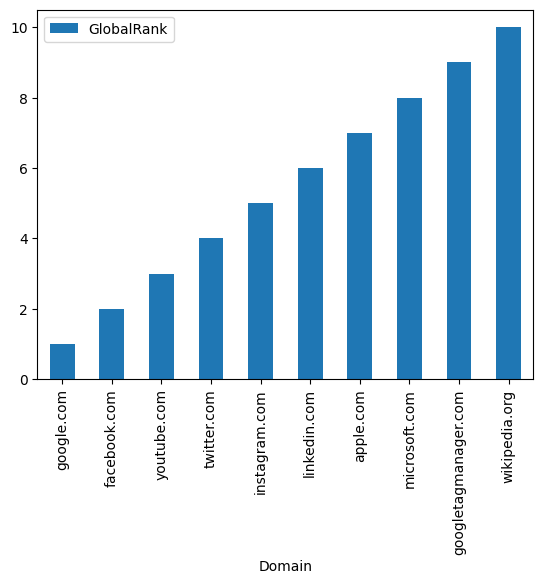

In [ ]:
#Top 10 websites with highest values of visitors traffic
print("Top 10 websites with highest value of visitors traffic:")

traffic_dataset.sort_values(by="GlobalRank") \
    .head(10) \
        .plot(x="Domain", y="GlobalRank", kind="bar", fontsize=10)
traffic_dataset.sort_values(by="GlobalRank").head(10)

Top 10 websites with lowest value of visitors traffic:


,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
999990,999991,485319,eiretrip.com,com,222,280,eiretrip.com,com,-1,-1,-1,-1
999991,999992,485320,exploring-africa.com,com,222,280,exploring-africa.com,com,-1,-1,-1,-1
999992,999993,485321,hmag.com,com,222,280,hmag.com,com,-1,-1,-1,-1
999993,999994,485322,irishcycle.com,com,222,280,irishcycle.com,com,968062,469365,229,285
999994,999995,485323,keith-baker.com,com,222,280,keith-baker.com,com,973079,471891,228,287
999995,999996,485324,kireie.com,com,222,280,kireie.com,com,-1,-1,-1,-1
999996,999997,485325,mt-lock.com,com,222,280,mt-lock.com,com,952633,461429,232,284
999997,999998,485326,pinkwater.com,com,222,280,pinkwater.com,com,-1,-1,-1,-1
999998,999999,485327,soderhomes.com,com,222,280,soderhomes.com,com,-1,-1,-1,-1
999999,1000000,485328,toyotamusicfactory.com,com,222,280,toyotamusicfactory.com,com,973201,471949,228,284


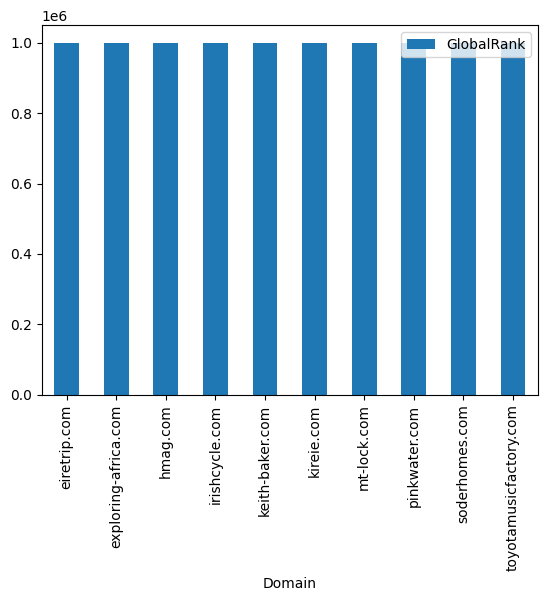

In [ ]:
#Bottom 10 websites with highest values of visitors traffic
print("Top 10 websites with lowest value of visitors traffic:")

traffic_dataset.sort_values(by="GlobalRank") \
    .tail(10) \
        .plot(x="Domain", y="GlobalRank", kind="bar", fontsize=10)
traffic_dataset.sort_values(by="GlobalRank").tail(10)

In [33]:
# Top and bottom 10 countries with the highest number of news media organisations (represented by domains in the data)
domains_dataset = domains_dataset.rename(columns={'SourceCommonName':'Domain_Name'})
domains_dataset.groupby('Country')['Domain_Name'].value_counts().groupby('Country').head(10)   #unsure of

# domains_dataset

Country      Domain_Name             
Afghanistan  afghanistan-analysts.org    1
             afghanistansun.com          1
             afghanpaper.com             1
             aihrc.org.af                1
             antonyloewenstein.com       1
                                        ..
Zimbabwe     greatindaba.com             1
             healzimbabwe.co.zw          1
             herald.co.zw                1
             hrforumzim.org              1
             insiderzim.com              1
Name: count, Length: 1827, dtype: int64

In [36]:
# Top and bottom 10 countries with the highest number of news media organisations (represented by domains in the data)
domains_dataset = domains_dataset.rename(columns={'SourceCommonName':'Domain_Name'})
domains_dataset.groupby('Country')['Domain_Name'].value_counts().groupby('Country').tail(10)   #unsure of

Country      Domain_Name          
Afghanistan  khaama.com               1
             lavieoverseas.com        1
             longwarjournal.org       1
             mail.gov.af              1
             mfa.gov.af               1
                                     ..
Zimbabwe     zimbabwesituation.com    1
             zimbabwestar.com         1
             zimdaily.com             1
             zimeye.com               1
             zimeye.net               1
Name: count, Length: 1827, dtype: int64

In [37]:
# Countries that have many articles written about them - the content of the news is about that country
rating_dataset



,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral
58352,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral
58353,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,Negative
58354,781240,NaN,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 13:44:33,Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,Neutral


In [ ]:
# Websites that reported (the news content) about Africa, US, China, EU, Russia, Ukraine, Middle East? Note that you will need to group countries together to form the African, EU, and Middle East continents/regions.
# Websites with the highest count of positive, neutral, and negative sentiment? To do this you will need to group the data by website domain and apply descriptive statistics such as mean, median, and variance
# compare the impact of using mean/average and median, 


In [38]:
# check the distribution of sentiments for a particular domain (select the top 10 domains by visitors traffic) amount of news reported or vs the global news sentiment distribution)
rating_dataset
#NLTK for sentiment analysis
#TextBlob to provide a sentiment score
#Visalize your findings

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral
58352,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral
58353,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,Negative
58354,781240,NaN,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 13:44:33,Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,Neutral
